# Shards + gravitational focusing effect
Velocity distribution of the SHM+Shards halo with gravitational focusing effect (see below) on the speed distributions and annual modulation

![title](../plots/plots_png/Lee-GravFocusDiagram.png)

Taken from https://arxiv.org/abs/1308.1953

- Gravitational focusing adds a separate modulating component due to the overall enhancement in the dark matter density. This adds to the one present due to the relative motion of the halo and the Earth to give two separetly modulating effects

- The focusing is implemented in such a way to spoil the unitarity of $f(v)$, which is interpreted as an enhacement of the dark matter density relative to the value at $\infty$

- This section of the code is slow due to the fine resolution needed when computing the angular integrals

In [4]:
from numpy import *
from numpy.random import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *
import pandas

# Set plot rc params
plt.rcParams['axes.linewidth'] = 2.5
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Halo params
HaloModel = SHMpp
v0 = HaloModel.RotationSpeed
v_esc = HaloModel.EscapeSpeed
beta = HaloModel.SausageBeta
sig_beta = HaloModel.SausageDispersionTensor
sig_iso = array([1.0,1.0,1.0])*v0/sqrt(2.0)


# Load shards
df = pandas.read_csv('../data/FitShards_red.csv')
names = df.group_id
nshards = size(names)
velocities = zeros(shape=(nshards,3))
dispersions = zeros(shape=(nshards,3))
velocities[0:(nshards),0] = df.vx # stream velocities
velocities[0:(nshards),1] = df.vy
velocities[0:(nshards),2] = df.vz
dispersions[0:(nshards),0] = df.sigx # dispersion tensors
dispersions[0:(nshards),1] = df.sigy
dispersions[0:(nshards),2] = df.sigz
pops = df.population
Psun = df.Psun
weights = ShardsWeights(names,pops,Psun)

# v_mins
n = 1000
v_min = linspace(0.01,750.0,n)

# Times
ndays = 365
days = linspace(0.0,365.0-365.0/ndays,ndays)

# Calculate everything
gmin_Iso = zeros(shape=(ndays,n))
gmin_Iso_gf = zeros(shape=(ndays,n))
gmin_Saus = zeros(shape=(ndays,n))
gmin_Saus_gf = zeros(shape=(ndays,n))
gmin_sub = zeros(shape=(ndays,n))
gmin_sub_gf = zeros(shape=(ndays,n))
for i in range(0,ndays):
    gmin_Iso[i,:] = gvmin_Triaxial(v_min,days[i],sig_iso)
    gmin_Iso_gf[i,:] = gvmin_Triaxial(v_min,days[i],sig_iso,GravFocus=True)
    
    gmin_Saus[i,:] = gvmin_Triaxial(v_min,days[i],sig_beta)
    gmin_Saus_gf[i,:] = gvmin_Triaxial(v_min,days[i],sig_beta,GravFocus=True)

    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        gmin_sub[i,:] += weights[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s)
        gmin_sub_gf[i,:] += weights[isub]*gvmin_Triaxial(v_min,days[i],sig_s,v_shift=v_s,GravFocus=True)
    
    
    print('day = ',i,'of',ndays,sum(gmin_sub[i,:]),sum(gmin_sub_gf[i,:]))

day =  0 of 365 1.3334684859942392 1.33859813140874
day =  1 of 365 1.3334679215593228 1.3387901808352702
day =  2 of 365 1.3334676268775483 1.3392027141526361
day =  3 of 365 1.3334673310695861 1.3396530894545065
day =  4 of 365 1.3334670339242938 1.3402361980305801
day =  5 of 365 1.3334667364440733 1.3406984948051266
day =  6 of 365 1.3334664378183845 1.3409358985352131
day =  7 of 365 1.3334661399935852 1.3412856658915882
day =  8 of 365 1.3334658414472598 1.341489720646582
day =  9 of 365 1.3334655431631097 1.341594284081017
day =  10 of 365 1.3334652454018547 1.3417549863782674
day =  11 of 365 1.333464946534864 1.341356424993828
day =  12 of 365 1.3334646495008409 1.3411315235987888
day =  13 of 365 1.3334643533990946 1.3411384716491603
day =  14 of 365 1.333464056436556 1.3409945409590505
day =  15 of 365 1.3334637615335376 1.3410843559169676
day =  16 of 365 1.3334634678090964 1.3411721382788393
day =  17 of 365 1.3334628340885346 1.3416609248545674
day =  18 of 365 1.33346254

day =  150 of 365 1.333456048347538 1.3369856308905097
day =  151 of 365 1.3334563375527135 1.3367979915339137
day =  152 of 365 1.3334566274774584 1.336540245109257
day =  153 of 365 1.3334569363034208 1.3363529253015463
day =  154 of 365 1.3334572470270445 1.3363376945062806
day =  155 of 365 1.3334575606660846 1.3359703373198433
day =  156 of 365 1.3334578749264505 1.335786954738933
day =  157 of 365 1.3334581834046797 1.335774522613278
day =  158 of 365 1.3334585031134198 1.3356438165287616
day =  159 of 365 1.333458834429377 1.33571093247806
day =  160 of 365 1.333459141418928 1.335595313759333
day =  161 of 365 1.33346016064486 1.3358061688654612
day =  162 of 365 1.3334604712989835 1.3356291136793565
day =  163 of 365 1.3334607725920697 1.3356139022355595
day =  164 of 365 1.333461086739779 1.3356441771518883
day =  165 of 365 1.3334614052982048 1.3358705146661989
day =  166 of 365 1.3334617142343643 1.3356312839354956
day =  167 of 365 1.333462036250127 1.3356092814248657
day =

day =  298 of 365 1.3334805722891578 1.3300645077523936
day =  299 of 365 1.3334805049084864 1.3299773090721434
day =  300 of 365 1.3334804347269016 1.3305326210431152
day =  301 of 365 1.3334803625264589 1.3306564497186055
day =  302 of 365 1.3334802869339362 1.3306137932803417
day =  303 of 365 1.333480209067265 1.3314270040927756
day =  304 of 365 1.3334803359166845 1.3311312654472607
day =  305 of 365 1.3334802517102529 1.3313581794183944
day =  306 of 365 1.3334801646327565 1.3320479091095352
day =  307 of 365 1.333480074720421 1.331835171568726
day =  308 of 365 1.3334799811180051 1.3326815335382767
day =  309 of 365 1.3334798851997836 1.3323719312057531
day =  310 of 365 1.3334797862463397 1.3328503261045954
day =  311 of 365 1.3334796832878055 1.3329527233522167
day =  312 of 365 1.3334795774032424 1.3332328712963961
day =  313 of 365 1.3334794672537724 1.3334848901912064
day =  314 of 365 1.33347935422779 1.3336877895390393
day =  315 of 365 1.3334792379500102 1.33396916284336

In [5]:
savetxt('../data/gvmin/gvmin_Halo.txt',vstack((v_min,gmin_Iso)),delimiter='\t',fmt="%1.12f")
savetxt('../data/gvmin/gvmin_Halo_GF.txt',vstack((v_min,gmin_Iso_gf)),delimiter='\t',fmt="%1.12f")

savetxt('../data/gvmin/gvmin_Saus.txt',vstack((v_min,gmin_Saus)),delimiter='\t',fmt="%1.12f")
savetxt('../data/gvmin/gvmin_Saus_GF.txt',vstack((v_min,gmin_Saus_gf)),delimiter='\t',fmt="%1.12f")

savetxt('../data/gvmin/gvmin_Shards.txt',vstack((v_min,gmin_sub)),delimiter='\t',fmt="%1.12f")
savetxt('../data/gvmin/gvmin_Shards_GF.txt',vstack((v_min,gmin_sub_gf)),delimiter='\t',fmt="%1.12f")

In [6]:
# Saving f(v) modulations

# v_mins
n = 1000
v = linspace(0.01,750.0,n)

# Times
ndays = 365
days = linspace(0.0,365.0-365.0/ndays,ndays)

# Calculate everything
fv_Iso = zeros(shape=(ndays,n))
fv_Iso_gf = zeros(shape=(ndays,n))
fv_Saus = zeros(shape=(ndays,n))
fv_Saus_gf = zeros(shape=(ndays,n))
fv_sub = zeros(shape=(ndays,n))
fv_sub_gf = zeros(shape=(ndays,n))
for i in range(0,ndays):
    fv_Iso[i,:] = SpeedDist_Triaxial(v,days[i],sig_iso)
    fv_Iso_gf[i,:] = SpeedDist_Triaxial(v,days[i],sig_iso,GravFocus=True)
    
    fv_Saus[i,:] = SpeedDist_Triaxial(v,days[i],sig_beta)
    fv_Saus_gf[i,:] = SpeedDist_Triaxial(v,days[i],sig_beta,GravFocus=True)

    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        fv_sub[i,:] += weights[isub]*SpeedDist_Triaxial(v,days[i],sig_s,v_shift=v_s)
        fv_sub_gf[i,:] += weights[isub]*SpeedDist_Triaxial(v,days[i],sig_s,v_shift=v_s,GravFocus=True)
    
    
    print('day = ',i,'of',ndays,sum(fv_sub[i,:]),sum(fv_sub_gf[i,:]))

day =  0 of 365 1.3320209619754748 1.3369220577585315
day =  1 of 365 1.3320209815603328 1.3371131604326414
day =  2 of 365 1.3320210009248288 1.3375244839622629
day =  3 of 365 1.3320210185824213 1.3379735217701207
day =  4 of 365 1.3320210363992173 1.3385542576401113
day =  5 of 365 1.3320210605394385 1.3390145666839515
day =  6 of 365 1.3320210821612963 1.3392512967335524
day =  7 of 365 1.3320210873451566 1.3395997177433658
day =  8 of 365 1.3320211108267435 1.3398030639383651
day =  9 of 365 1.3320211328133291 1.3399063302673504
day =  10 of 365 1.3320211549946 1.3400651674368347
day =  11 of 365 1.3320211878087411 1.3396649512397447
day =  12 of 365 1.3320212068719983 1.3394389531466575
day =  13 of 365 1.332021228770041 1.3394443602035389
day =  14 of 365 1.3320212402633376 1.3393005227428012
day =  15 of 365 1.3320212680386776 1.3393889631094305
day =  16 of 365 1.33202129668922 1.3394749940677306
day =  17 of 365 1.3320213171205744 1.33996190257746
day =  18 of 365 1.332021344

KeyboardInterrupt: 

In [ ]:
savetxt('../data/fv/fv_Halo.txt',vstack((v,fv_Iso)),delimiter='\t',fmt="%1.12f")
savetxt('../data/fv/fv_Halo_GF.txt',vstack((v,fv_Iso_gf)),delimiter='\t',fmt="%1.12f")

savetxt('../data/fv/fv_Saus.txt',vstack((v,fv_Saus)),delimiter='\t',fmt="%1.12f")
savetxt('../data/fv/fv_Saus_GF.txt',vstack((v,fv_Saus_gf)),delimiter='\t',fmt="%1.12f")

savetxt('../data/fv/fv_Shards.txt',vstack((v,fv_sub)),delimiter='\t',fmt="%1.12f")
savetxt('../data/fv/fv_Shards_GF.txt',vstack((v,fv_sub_gf)),delimiter='\t',fmt="%1.12f")

In [18]:
# DM params
A = 23
m_chi = 10.0
sigma_p = 1.0e-45
E_th = 2.0
E_max = 50.0
E = logspace(log(0.01),log10(E_max),n)
v_min_E = MinimumWIMPSpeed(E,A,m_chi)

# Calculate everything
dR0 = zeros(shape=(ndays,n))
dR = zeros(shape=(ndays,n))
R = zeros(shape=ndays)
R0 = zeros(shape=ndays)
dR0_gf = zeros(shape=(ndays,n))
dR_gf = zeros(shape=(ndays,n))
R_gf = zeros(shape=ndays)
R0_gf = zeros(shape=ndays)
for i in range(0,ndays):
    g0 = interp(v_min_E,v_min,gmin0[i,:])
    gs = interp(v_min_E,v_min,gmin_sub[i,:])
    g0_gf = interp(v_min_E,v_min,gmin0_gf[i,:])
    gs_gf = interp(v_min_E,v_min,gmin_sub_gf[i,:])
    dR[i,:] = diffRecoilRate_SI(E,gs,A,sigma_p,m_chi,rho_0=0.55)
    dR_gf[i,:] = diffRecoilRate_SI(E,gs_gf,A,sigma_p,m_chi,rho_0=0.55)
    dR0[i,:] = diffRecoilRate_SI(E,g0,A,sigma_p,m_chi,rho_0=0.55)
    dR0_gf[i,:] = diffRecoilRate_SI(E,g0_gf,A,sigma_p,m_chi,rho_0=0.55)
    R[i] = trapz(dR[i,(E>E_th)],E[E>E_th])
    R_gf[i] = trapz(dR[i,(E>E_th)],E[E>E_th])

    R0[i] = trapz(dR0[i,(E>E_th)],E[E>E_th])
    R0_gf[i] = trapz(dR0_gf[i,(E>E_th)],E[E>E_th])

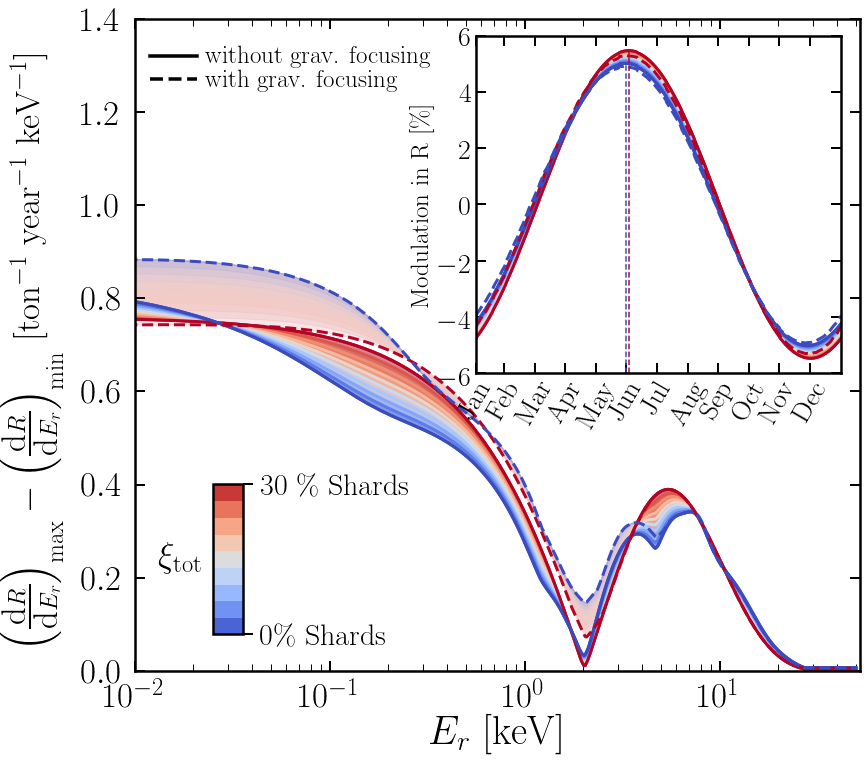

In [19]:
import matplotlib.gridspec as gridspec

Rdiff = zeros(shape=n)
Rdiff0 = zeros(shape=n)
Rdiff_gf = zeros(shape=n)
Rdiff0_gf = zeros(shape=n)
for i in range(0,n):
    Rdiff[i] = max(dR[:,i])-min(dR[:,i])
    Rdiff0[i] = max(dR0[:,i])-min(dR0[:,i])
    Rdiff_gf[i] = max(dR_gf[:,i])-min(dR_gf[:,i])
    Rdiff0_gf[i] = max(dR0_gf[:,i])-min(dR0_gf[:,i])

# Figure
pltname = 'Shards_annualmod_gravfocus'
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
left, bottom, width, height = [0.49, 0.47, 0.39, 0.39]
ax2 = fig.add_axes([left, bottom, width, height])


n_xi = 10
xi_vals = linspace(0,0.35,n_xi)
col = flipud(cm.coolwarm(linspace(0,1,n_xi)))
cmap = cm.coolwarm

# Main plot
plt.sca(ax1)
y2 = xi_vals[-1]*Rdiff+(1-xi_vals[-1])*Rdiff0
y2_gf = xi_vals[-1]*Rdiff_gf+(1-xi_vals[-1])*Rdiff0_gf
for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(E,xi_vals[i]*Rdiff+(1-xi_vals[i])*Rdiff0,'-',color=col[i,:],linewidth=3)
    
plt.plot(E,Rdiff0,linewidth=3,color=col[0,:])
plt.plot(E,y2,linewidth=3,color=col[-1,:])


for i in range(0,n_xi):
    plt.fill_between(E,xi_vals[i]*Rdiff_gf+(1-xi_vals[i])*Rdiff0_gf,y2=y2_gf,color=col[i,:],alpha=0.1)
plt.plot(E,Rdiff0_gf,'--',linewidth=3,color=col[0,:])
plt.plot(E,y2_gf,'--',linewidth=3,color=col[-1,:])

plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.xlabel(r"$E_r$ [keV]",fontsize=40);
plt.ylabel(r"$\left(\frac{\textrm{d}R}{\textrm{d}E_r}\right)_{\rm max} - \left(\frac{\textrm{d}R}{\textrm{d}E_r}\right)_{\rm min}$ [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]" ,fontsize=35,labelpad=10);
ax1.set_xlim(left=0.01)
ax1.set_ylim(bottom=0.0,top=1.4)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=12)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax1.set_xscale('log')

# second "legend"
ax1.plot([0.012,0.021],[1.32,1.32], 'k-',linewidth=3.5)
ax1.plot([0.012,0.021],[1.27,1.27], 'k--',linewidth=3.5)
ax1.text(0.023,1.35-0.045,'without grav. focusing',fontsize=25)
ax1.text(0.023,1.3-0.045,'with grav. focusing',fontsize=25)





# Inset plot
plt.sca(ax2)
ymax = 6

R0mid = (max(R0)+min(R0))/2.0
Rmid = (max(R)+min(R))/2.0
R0mid_gf = (max(R0_gf)+min(R0_gf))/2.0
Rmid_gf = (max(R_gf)+min(R_gf))/2.0
y2 = 100*xi_vals[-1]*(R-Rmid)/Rmid+100*(1.0-xi_vals[-1])*(R0-R0mid)/R0mid
y2_gf = 100*xi_vals[-1]*(R_gf-Rmid_gf)/Rmid_gf+100*(1.0-xi_vals[-1])*(R0_gf-R0mid_gf)/R0mid_gf

for i in range(0,n_xi):
    Rt = 100*xi_vals[i]*(R-Rmid)/Rmid+100*(1.0-xi_vals[i])*(R0-R0mid)/R0mid
    plt.fill_between(days,Rt,y2=y2,color=col[i,:],alpha=0.5)
    plt.plot(days,Rt,'-',color=col[i,:],linewidth=3)
plt.plot(days,100*(R0-R0mid)/R0mid,linewidth=3,color=col[0,:])
plt.plot(days,y2,linewidth=3,color=col[-1,:])
plt.plot(days,100*(R0_gf-R0mid_gf)/R0mid_gf,'--',linewidth=3,color=col[0,:])
plt.plot(days,y2_gf,'--',linewidth=3,color=col[-1,:])
diffR = 100*(R0-R0mid)/R0mid
plt.plot([days[argmax(diffR)],days[argmax(diffR)]],[-ymax,amax(diffR)],'--',color=col[0,:])
plt.plot([days[argmax(y2)],days[argmax(y2)]],[-ymax,amax(y2)],'--',color=col[-1,:])

#diffR_gf = 100*(R0_gf-R0mid_gf)/R0mid_gf
#plt.plot([days[argmax(diffR_gf)],days[argmax(diffR_gf)]],[-ymax,amax(diffR_gf)],'--',color=col[0,:])
#plt.plot([days[argmax(y2_gf)],days[argmax(y2_gf)]],[-ymax,amax(y2_gf)],'--',color=col[-1,:])


plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
ax2.set_xlim(left=0.0,right=365)
ax2.set_ylim(bottom=-ymax,top=ymax)
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=60)
plt.ylabel(r"Modulation in R [\%]" ,fontsize=25);
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=4,labelsize=28)

# Custom colorbar
cbar_max = r'30 \% Shards'
cbar_min = r'0\% Shards'
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax2, width="15%", height="30%", bbox_to_anchor=[30, -200, 200, 500]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min,cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.15,0.24,r'$\xi_{\rm tot}$',fontsize=35,color='k')


plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

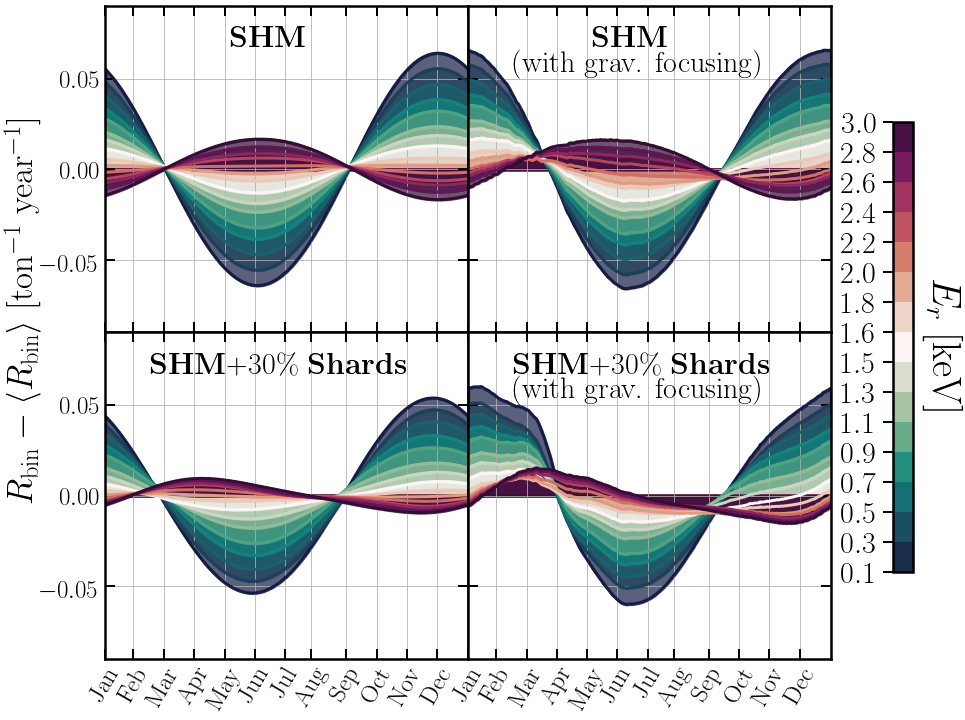

In [20]:
import matplotlib.gridspec as gridspec
pltname = 'Shards_annualmod_gravfocus_Energies'


nbins = 15
bin_edges = linspace(0.1,3.0,nbins+1)

def bin_dR(fdR):
    Rbin = zeros(shape=(ndays,nbins))
    for i in range(0,ndays):
        for j in range(0,nbins):
            E1 = bin_edges[j]
            E2 = bin_edges[j+1]
            Ec = E[(E>E1)&(E<E2)]
            dRc = fdR[i,(E>E1)&(E<E2)]
            Rbin[i,j] = trapz(dRc,Ec)
    return Rbin

Rbin0 = bin_dR(dR0)
Rbin0_gf = bin_dR(dR0_gf)
Rbin = bin_dR((1-0.3)*dR0+0.3*dR)
Rbin_gf = bin_dR((1-0.3)*dR0_gf+0.3*dR_gf)

# Set up subplots
fig, axarr = plt.subplots(2, 2,figsize=(13,12))
gs = gridspec.GridSpec(2, 2)
gs.update(hspace=0.0,wspace=0.0)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[1,0])
ax4 = plt.subplot(gs[1,1])

ymax = 0.09
labelx = 125
labely = 0.75*ymax
ticklocs = cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31
ticklocs[7] -= 5
ticklabs = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.sca(ax1)
import cmocean
colbins = (cmocean.cm.curl(linspace(0,1,nbins)))
cmap = cmocean.cm.curl
for i in range(0,nbins):
    yc = Rbin0[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
plt.xticks(ticklocs)
plt.text(labelx,labely,r'{\bf SHM}',fontsize=30)
        
plt.sca(ax2)
for i in range(0,nbins):
    yc = Rbin0_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
plt.xticks(ticklocs)
plt.text(labelx,labely,r'{\bf SHM}',fontsize=30)
plt.text(labelx-80,labely-0.013,r'(with grav. focusing)',fontsize=30)

plt.sca(ax3)
for i in range(0,nbins):
    yc = Rbin[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])
plt.xticks(ticklocs,ticklabs,rotation=60)
plt.text(labelx-80,labely,r'{\bf SHM}+30\% {\bf Shards}',fontsize=30)

plt.sca(ax4)
for i in range(0,nbins):
    yc = Rbin_gf[:,i]
    Rmid = (max(yc)+min(yc))/2.0
    plt.fill_between(days,yc-Rmid,y2=0.0,linewidth=3,color=colbins[i,:],alpha=0.7)
    plt.plot(days,yc-Rmid,'-',linewidth=3,color=colbins[i,:])   
plt.xticks(ticklocs,ticklabs,rotation=60)
plt.text(labelx-80,labely,r'{\bf SHM}+30\% {\bf Shards}',fontsize=30)
plt.text(labelx-80,labely-0.013,r'(with grav. focusing)',fontsize=30)

    
ax1.set_xticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax4.set_yticklabels([])

ax1.set_xlim([0,days[-1]])
ax2.set_xlim([0,days[-1]])
ax3.set_xlim([0,days[-1]])
ax4.set_xlim([0,days[-1]])
ax1.set_ylim([-ymax,ymax])
ax2.set_ylim([-ymax,ymax])
ax3.set_ylim([-ymax,ymax])
ax4.set_ylim([-ymax,ymax])

# Custom colorbar
cbaxes = inset_axes(ax2, width="10%", height="90%", bbox_to_anchor=[730, 150, 200, 500]) 
norm = mpl.colors.Normalize(vmin=bin_edges[0],vmax=bin_edges[-1])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=around(bin_edges,1),boundaries=around(bin_edges,1),orientation='vertical')
f = plt.gcf().get_children()
cbar = f[5]
cbar.tick_params(labelsize=20) 
cbar.tick_params(which='major',direction='out',width=2,length=10,left=True,right=False,pad=7,labelsize=30)
cbar.tick_params(which='minor',direction='out',width=2,length=7,left=True,right=False)
cbar.yaxis.set_ticks_position('left')
cbar.set_ylabel(r'$E_r$ [keV]',rotation=-90,labelpad=45)
cbar.yaxis.label.set_size(40)
#cbar.yaxis.set_label_position("right")
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax2.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax2.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax3.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax3.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)
ax4.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=5,labelsize=25)
ax4.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

#ax1.set_ylabel(r'\quad\quad\quad$R_{\rm bin}-\langle R_{\rm bin}\rangle$ [ton$^{-1}$ year$^{-1}$]',fontsize=30)
#ax3.set_ylabel(r'\quad\quad\quad$R_{\rm bin}-\langle R_{\rm bin}\rangle$ [ton$^{-1}$ year$^{-1}$]',fontsize=30)
plt.gcf().text(0.02,0.72,r'\quad\quad\quad$R_{\rm bin}-\langle R_{\rm bin}\rangle$ [ton$^{-1}$ year$^{-1}$]',rotation=90,fontsize=35)

plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')

In [50]:
around(bin_edges,2)

array([ 0.1 ,  0.29,  0.49,  0.68,  0.87,  1.07,  1.26,  1.45,  1.65,
        1.84,  2.03,  2.23,  2.42,  2.61,  2.81,  3.  ])

In [ ]:
# Overall Normalisation

# Pre-allocate
fv0 = zeros(shape=(ndays,n))
fv0_gf = zeros(shape=(ndays,n))
fv = zeros(shape=(ndays,n))
fv_gf = zeros(shape=(ndays,n))

# Loop over days to get all speed distributions for the year
for i in range(0,ndays):
    day = days[i]
    fv0[i,:] = (1-eta)*SpeedDist_Triaxial(v,day,array([1.0,1.0,1.0])*233.0/sqrt(2.0),v_esc=1000.0)\
            +eta*SpeedDist_Triaxial(v,day,sig_beta,v_esc=1000.0) # Unfocused SHM++
    fv0_gf[i,:] = (1-eta)*SpeedDist_Triaxial(v,day,array([1.0,1.0,1.0])*233.0/sqrt(2.0),v_esc=1000.0,GravFocus=True)\
                +eta*SpeedDist_Triaxial(v,day,sig_beta,v_esc=1000.0,GravFocus=True) # Focused SHM++
        
    # Loop over each shard
    for isub in range(0,nshards):
        v_s = velocities[isub,:]
        sig_s = dispersions[isub,:]
        fv[i,:] += pops[isub]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,v_esc=1000.0) # Unfocused shards
        fv_gf[i,:] += pops[isub]*SpeedDist_Triaxial(v,day,sig_s,v_shift=v_s,v_esc=1000.0,GravFocus=True) # Focused shards
    print 'day = ',i # print progress

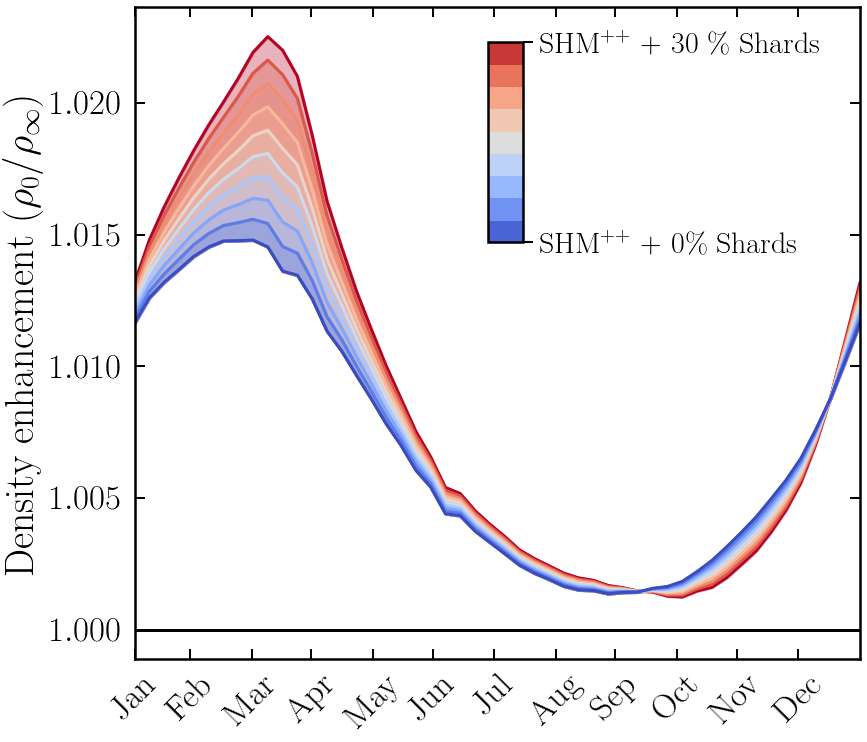

In [33]:
# Set up plot
fig = plt.figure(figsize=(13,12))
ax1 = fig.add_subplot(111)
pltname = 'Shards_GravFocusedDensity'

# Preallocate densities
rho0 = zeros(shape=ndays)
rho0_gf = zeros(shape=ndays)
rho = zeros(shape=ndays)
rho_gf = zeros(shape=ndays)
   
# Calculate density enhancement by integrating over f(v)
for i in range(0,ndays):
    rho0[i] = trapz(fv0[i,:],v)
    rho0_gf[i] = trapz(fv0_gf[i,:],v)

# Plot for each value of xi (shard fraction)
col = (cm.coolwarm(linspace(0,1,n_xi)))
for j in range(0,n_xi):
    ix = n_xi-1-j
    xi = xi_vals[ix]
    for i in range(0,ndays):
        rho[i] = trapz((1-xi)*fv0[i,:]+xi*fv[i,:],v)
        rho_gf[i] = trapz((1-xi)*fv0_gf[i,:]+xi*fv_gf[i,:],v)
    plt.fill_between(days,rho_gf,y2=rho0_gf,linewidth=3,color=col[ix,:],alpha=0.3)
    plt.plot(days,rho_gf,linewidth=3,color=col[ix,:])

# Plot 0-points (should be = 1)
for i in range(0,ndays):
    rho[i] = trapz(fv[i,:],v)
plt.plot(days,rho0,'--',color=col[0,:])
plt.plot(days,rho,'--',color=col[-1,:])

# rho = rho_0 line
plt.plot([0,365],[1,1],'k-',linewidth=3)

# Plot fiddling
plt.ylabel(r'Density enhancement ($\rho_0/\rho_\infty$)',fontsize=40)
plt.xlim([0,365])
plt.xticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
           rotation=45)
ax1.tick_params(which='major',direction='in',width=2,length=10,right=True,top=True,pad=10,labelsize=35)
ax1.tick_params(which='minor',direction='in',width=1,length=7,right=True,top=True)

# Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbaxes = inset_axes(ax1, width="5%", height="50%", bbox_to_anchor=[-190, 330, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=30) 
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)


# Show and save
plt.show()
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')